# Bagging

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
x = np.load('tatanic_X_train.npy')
y = np.load('tatanic_y_train.npy')

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [4]:
print(x_train.shape)

(622, 27)


In [5]:
print(y_train.shape)

(622,)


In [6]:
print(x_test.shape)

(267, 27)


In [7]:
print(y_test.shape)

(267,)


In [9]:
x_train[0]

array([0.40498559, 0.05869429, 0.        , 0.5       , 0.        ,
       0.125     , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [10]:
y_train[:10]

array([0., 0., 0., 1., 1., 1., 0., 0., 0., 0.])

In [11]:
x_test[0]

array([0.32356257, 0.03667076, 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [12]:
y_test[:10]

array([1., 1., 1., 1., 0., 1., 1., 0., 0., 1.])

In [13]:
clf2 = DecisionTreeClassifier(random_state=1)
eclf = BaggingClassifier(clf2,oob_score=True)

In [14]:
clf2.fit(x_train,y_train)
preds = clf2.predict(x_test)
clf2.score(x_test,y_test)

0.7415730337078652

In [15]:
eclf.fit(x_train,y_train)
predictions = eclf.predict(x_test)
eclf.score(x_test,y_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


0.7752808988764045

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,predictions)

array([[132,  23],
       [ 37,  75]], dtype=int64)

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       155
         1.0       0.77      0.67      0.71       112

   micro avg       0.78      0.78      0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.77      0.78      0.77       267



In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(eclf,x,y,cv=5).mean()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probabl

0.8099282676315622

In [19]:
params ={
"n_estimators" : [10,20,30,40,50,55], # estimator
"max_samples" : [0.5,0.6,0.7,0.8,0.9,1] # sample
}


In [20]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(eclf,params,verbose=3)

In [21]:
grid.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] max_samples=0.5, n_estimators=10 ................................
[CV]  max_samples=0.5, n_estimators=10, score=0.8221153846153846, total=   0.0s
[CV] max_samples=0.5, n_estimators=10 ................................
[CV]  max_samples=0.5, n_estimators=10, score=0.8260869565217391, total=   0.0s
[CV] max_samples=0.5, n_estimators=10 ................................
[CV]  max_samples=0.5, n_estimators=10, score=0.8357487922705314, total=   0.0s
[CV] max_samples=0.5, n_estimators=20 ................................
[CV] ... max_samples=0.5, n_estimators=20, score=0.8125, total=   0.0s
[CV] max_samples=0.5, n_estimators=20 ................................
[CV]  max_samples=0.5, n_estimators=20, score=0.8260869565217391, total=   0.0s
[CV] max_samples=0.5, n_estimators=20 ................................
[CV]  max_samples=0.5, n_estimators=20, score=0.8502415458937198, total=   0.0s
[CV] max_samples=0.5, n_estimators=30 ...

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


[CV]  max_samples=0.7, n_estimators=30, score=0.8461538461538461, total=   0.0s
[CV] max_samples=0.7, n_estimators=30 ................................
[CV]  max_samples=0.7, n_estimators=30, score=0.7971014492753623, total=   0.0s
[CV] max_samples=0.7, n_estimators=30 ................................
[CV]  max_samples=0.7, n_estimators=30, score=0.8357487922705314, total=   0.0s
[CV] max_samples=0.7, n_estimators=40 ................................
[CV]  max_samples=0.7, n_estimators=40, score=0.8365384615384616, total=   0.0s
[CV] max_samples=0.7, n_estimators=40 ................................
[CV]  max_samples=0.7, n_estimators=40, score=0.8067632850241546, total=   0.0s
[CV] max_samples=0.7, n_estimators=40 ................................
[CV]  max_samples=0.7, n_estimators=40, score=0.8599033816425121, total=   0.0s
[CV] max_samples=0.7, n_estimators=50 ................................
[CV]  max_samples=0.7, n_estimators=50, score=0.8317307692307693, total=   0.0s
[CV] max_sampl

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


[CV]  max_samples=0.8, n_estimators=20, score=0.8115942028985508, total=   0.0s
[CV] max_samples=0.8, n_estimators=20 ................................
[CV]  max_samples=0.8, n_estimators=20, score=0.8502415458937198, total=   0.0s
[CV] max_samples=0.8, n_estimators=30 ................................
[CV]  max_samples=0.8, n_estimators=30, score=0.8317307692307693, total=   0.0s
[CV] max_samples=0.8, n_estimators=30 ................................
[CV]  max_samples=0.8, n_estimators=30, score=0.7971014492753623, total=   0.0s
[CV] max_samples=0.8, n_estimators=30 ................................
[CV]  max_samples=0.8, n_estimators=30, score=0.855072463768116, total=   0.0s
[CV] max_samples=0.8, n_estimators=40 ................................
[CV]  max_samples=0.8, n_estimators=40, score=0.8413461538461539, total=   0.0s
[CV] max_samples=0.8, n_estimators=40 ................................
[CV]  max_samples=0.8, n_estimators=40, score=0.7971014492753623, total=   0.0s
[CV] max_sample

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probabl

[CV]  max_samples=0.9, n_estimators=30, score=0.7729468599033816, total=   0.0s
[CV] max_samples=0.9, n_estimators=30 ................................
[CV]  max_samples=0.9, n_estimators=30, score=0.855072463768116, total=   0.0s
[CV] max_samples=0.9, n_estimators=40 ................................
[CV]  max_samples=0.9, n_estimators=40, score=0.8413461538461539, total=   0.0s
[CV] max_samples=0.9, n_estimators=40 ................................
[CV]  max_samples=0.9, n_estimators=40, score=0.7971014492753623, total=   0.0s
[CV] max_samples=0.9, n_estimators=40 ................................
[CV]  max_samples=0.9, n_estimators=40, score=0.8647342995169082, total=   0.0s
[CV] max_samples=0.9, n_estimators=50 ................................
[CV]  max_samples=0.9, n_estimators=50, score=0.8173076923076923, total=   0.0s
[CV] max_samples=0.9, n_estimators=50 ................................
[CV]  max_samples=0.9, n_estimators=50, score=0.7874396135265701, total=   0.0s
[CV] max_sample

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    4.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            ...estimators=10, n_jobs=None, oob_score=True,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 55], 'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [22]:
grid.best_score_

0.8408360128617364

In [23]:
grid.best_params_

{'max_samples': 0.6, 'n_estimators': 50}

In [24]:
grid.best_estimator_.oob_score_

0.8311897106109325

In [25]:
grid.score(x_test,y_test)

0.7940074906367042

# random Forest

In [26]:
x=np.load('tatanic_X_train.npy')
y=np.load('tatanic_y_train.npy')

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [28]:
x_train[0]

array([0.76199424, 0.06538765, 0.        , 0.        , 0.        ,
       0.        , 0.25      , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [29]:
y_train[:10]

array([0., 1., 1., 0., 0., 0., 0., 0., 1., 1.])

In [30]:
from sklearn.ensemble import RandomForestClassifier
eclf = RandomForestClassifier(n_estimators=100,max_features=2,n_jobs=7,oob_score=True)

In [31]:
cross_val_score(eclf,x_train,y_train,cv=5).mean()

0.8023697875688436

In [33]:
params ={
"n_estimators" : [10, 20, 30, 50, 100],
"max_features" : [1,2,3,4,5,6,7, 10, 15, 20, 25, len(x[0])]
}

In [37]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(eclf,params,cv=5)

In [38]:
grid.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means t

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means t

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=7,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 50, 100], 'max_features': [1, 2, 3, 4, 5, 6, 7, 10, 15, 20, 25, 27]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
grid.best_score_

0.8295819935691319

In [40]:
grid.best_params_

{'max_features': 20, 'n_estimators': 30}

In [41]:
grid.best_estimator_.oob_score_

0.8231511254019293

In [42]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=7,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [44]:
grid.score(x_test, y_test)

0.8389513108614233

In [45]:
btree = RandomForestClassifier(max_features = 20, n_estimators = 20)

In [47]:
btree.fit(x_train, y_train)
btree.score(x_test, y_test)

0.8127340823970037

In [48]:
btree.feature_importances_

array([0.19614331, 0.22811298, 0.02067362, 0.08626308, 0.16849485,
       0.05695451, 0.01914734, 0.01114089, 0.00830158, 0.01110528,
       0.00239703, 0.00133255, 0.00561079, 0.01485865, 0.01104791,
       0.10535967, 0.00369746, 0.00476517, 0.01062253, 0.00371431,
       0.00488562, 0.00840064, 0.00866405, 0.00669924, 0.00064655,
       0.00096038, 0.        ])

# Adaboost

In [50]:
elements = ['one', 'two', 'three']
weights = [0.2, 0.3, 0.5]

In [52]:
from numpy.random import choice
print(choice(elements))
print(choice(elements, size=10, replace=True, p=weights))

two
['three' 'three' 'one' 'two' 'two' 'one' 'two' 'two' 'three' 'three']


In [53]:
x = np.load('tatanic_X_train.npy')
y=np.load('tatanic_y_train.npy')

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [56]:
print(x_train[:2])
print(y_train[:10])

[[0.76199424 0.06538765 0.         0.         0.         0.
  0.25       0.         0.         1.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.        ]
 [0.33608919 0.14976542 0.         0.         0.         0.
  0.25       1.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.        ]]
[0. 1. 1. 1. 0. 0. 1. 1. 0. 1.]


In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
eclf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=500,learning_rate=0.1)

In [58]:
cross_val_score(eclf,x_train,y_train,cv=5).mean()

0.556426011264721

In [59]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
 AdaBoostClassifier()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [61]:
params = {"base_estimator__criterion" : ["gini", "entropy"],
"base_estimator__max_features" : [7,8,],
"base_estimator__max_depth" : [1,2,3,4,5],
"n_estimators": [23,24, 25, 26, 27],
"learning_rate": [0.4, 0.45, 0.5, 0.55, 0.6]
}

In [62]:
grid = GridSearchCV(eclf,params)

In [63]:
grid.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=500, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'base_estimator__criterion': ['gini', 'entropy'], 'base_estimator__max_features': [7, 8], 'base_estimator__max_depth': [1, 2, 3, 4, 5], 'n_estimators': [23, 24, 25, 26, 27], 'learning_rate': [0.4, 0.45, 0.5, 0.55, 0.6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
grid.best_estimator_.feature_importances_

array([0.2173913 , 0.26086957, 0.13043478, 0.08695652, 0.        ,
       0.08695652, 0.        , 0.        , 0.        , 0.        ,
       0.08695652, 0.04347826, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04347826, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04347826, 0.        ])

In [65]:
grid.score(X_train, y_train)

0.6061093247588425

In [66]:
grid.score(X_test, y_test)

0.6254681647940075

# gradient boosting

In [70]:
train_dataset_dir = "./house_price/train.csv"
test_dataset_dir = "./house_price/test.csv" 

In [72]:
import pandas as pd 
import numpy as np

train = pd.read_csv("./house_price/train.csv" ) 
test = pd.read_csv("./house_price/test.csv" )
print(train.columns) 
print(test.columns) 
train.info() 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [73]:
pd.DataFrame(train.isnull().sum())

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


In [74]:
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.2)

In [75]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape


((711, 27), (178, 27), (711,), (178,))

In [76]:
train_X[:2]

array([[0.07303019, 0.06104473, 0.22222222, 1.        , 1.        ,
        0.5       , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.29850933, 0.13526459, 0.        , 0.        , 1.        ,
        0.        , 0.25      , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [77]:
 train_y[:10]

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 1.])

In [79]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [80]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [81]:
gbr = GradientBoostingRegressor(n_estimators=2000, subsample=0.5, max_depth=2, learning_rate=0.55)
lr = LinearRegression()

In [83]:
np.mean(cross_val_score(gbr, train_X, train_y, scoring="r2" , cv=5))

-0.027482632036120468

In [84]:
np.mean(cross_val_score(lr, train_X, train_y, scoring="r2" , cv=5))

0.41265523110259705

In [85]:
np.mean(cross_val_score(lr, train_X, train_y, cv=5))

0.41265523110259705

In [86]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [87]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=5000, subsample=0.5,learning_rate=0.05)
X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.3)

In [88]:
gbr.fit(X_train, y_train)
errors_val = [rmse(y_val, y_pred) for y_pred in gbr.staged_predict(X_val)]

In [89]:
errors_train = [rmse(y_train, y_pred) for y_pred in gbr.staged_predict(X_train)]

In [90]:
x_axis = list(range(len(errors_val)))
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

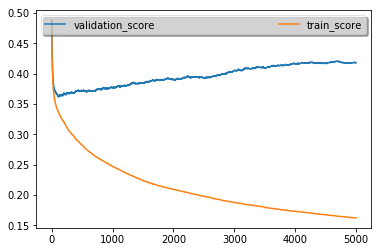

114 0.3616458515903575
0.3667815158640739


In [92]:
import matplotlib.pyplot as plt
ax = plt.subplot(111)
plt.plot(x_axis, errors_val, label="validation_score")
plt.plot(x_axis, errors_train, label="train_score")
leg = plt.legend(loc='best', ncol=2, mode="expand", \
shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.show()
bst_n_estimators = np.argmin(errors_val)
print(bst_n_estimators, errors_val[bst_n_estimators])
print(rmse(y_val, lr.predict(X_val)))


In [93]:
gbr = GradientBoostingRegressor(
max_depth=2, n_estimators=500, subsample=0.5,\
learning_rate=0.05)
X_train, X_val, y_train, y_val = \
train_test_split(train_X, train_y, test_size=0.3)
gbr.fit(X_train, y_train)
print(gbr.score(X_train, y_train))
print(gbr.score(X_val, y_val))

0.6626565971017656
0.4110050881449114


In [94]:
gbr_best = GradientBoostingRegressor(max_depth=2, \
subsample=0.5,learning_rate=0.05, n_estimators=500)
gbr_best.fit(train_X, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.5, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [95]:
test_y

array([0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0.])

In [96]:
id_value=test_y
sales_price = gbr_best.predict(test_X)

In [97]:
result = np.vstack([id_value, sales_price]).T
result

array([[ 0.        ,  0.37124537],
       [ 0.        ,  0.05730596],
       [ 0.        ,  0.06525365],
       [ 1.        ,  0.80617763],
       [ 1.        ,  0.25693386],
       [ 1.        ,  1.08741635],
       [ 0.        ,  0.15574391],
       [ 0.        ,  0.20283725],
       [ 0.        ,  0.24310175],
       [ 1.        ,  0.84033166],
       [ 1.        ,  0.90523389],
       [ 0.        ,  0.37980357],
       [ 1.        ,  0.89335553],
       [ 1.        ,  1.02456966],
       [ 0.        ,  0.02716873],
       [ 1.        ,  0.06119325],
       [ 0.        ,  0.4866975 ],
       [ 1.        ,  0.46247617],
       [ 0.        ,  0.06559161],
       [ 0.        ,  0.07032328],
       [ 0.        ,  0.35122948],
       [ 1.        ,  0.92709982],
       [ 1.        ,  0.90905993],
       [ 1.        ,  0.60301132],
       [ 0.        ,  0.52548952],
       [ 0.        ,  0.1754557 ],
       [ 0.        ,  0.05519886],
       [ 0.        ,  0.24666595],
       [ 0.        ,

In [100]:
pd.DataFrame(result, dtype=int, columns=["Id", "SalePrice"]).\
set_index("Id").to_csv("./house_price/house_price_result.csv")

In [115]:
from sklearn.model_selection import ShuffleSplit
param_grid={'n_estimators':[500, 1000, 2000],
'learning_rate': [0.1, 0.05], #0.02, 0.01],
            
'subsample' : [0.4,0.5],#,0.6,0.7,0.8],
'max_depth':[2, 4], #6 ,8],
'min_samples_leaf':[3, 5],#,9,15],
'max_features':[1.0, 0.3]#, 0.1]
}
n_jobs=7
estimator = GradientBoostingRegressor(warm_start=True)
cv = ShuffleSplit(X_train.shape[0], test_size=0.2)
classifier = GridSearchCV(estimator=estimator, cv=cv, \
param_grid=param_grid, n_jobs=n_jobs, verbose=1)
classifier.fit(train_X, train_y)
print (classifier.best_estimator_)


Fitting 497 folds for each of 96 candidates, totalling 47712 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    2.7s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    8.4s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:   18.1s
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:   32.3s
[Parallel(n_jobs=7)]: Done 1236 tasks      | elapsed:   59.8s
[Parallel(n_jobs=7)]: Done 1786 tasks      | elapsed:  1.7min
[Parallel(n_jobs=7)]: Done 2436 tasks      | elapsed:  3.2min
[Parallel(n_jobs=7)]: Done 3186 tasks      | elapsed:  4.8min
[Parallel(n_jobs=7)]: Done 4036 tasks      | elapsed:  5.4min
[Parallel(n_jobs=7)]: Done 4986 tasks      | elapsed:  6.7min
[Parallel(n_jobs=7)]: Done 6036 tasks      | elapsed:  9.3min
[Parallel(n_jobs=7)]: Done 7186 tasks      | elapsed: 10.0min
[Parallel(n_jobs=7)]: Done 8436 tasks      | elapsed: 11.7min
[Parallel(n_jobs=7)]: Done 9786 tasks      | elapsed: 13.0min
[Parallel(n_jobs=7)]: Done 11236 tasks      | elapsed: 14.6mi

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=2, max_features=1.0,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.5, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=True)


In [116]:
print(rmse(y_val, classifier.best_estimator_.predict(X_val)))

0.29572712342577606


In [117]:
print(rmse(y_val, classifier.predict(X_val)))

0.29572712342577606


In [118]:
final_estimator = classifier.best_estimator_
final_estimator.fit(train_X, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=2, max_features=1.0,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.5, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=True)

In [119]:
print(rmse(y_val, final_estimator.predict(X_val)))

0.29572712342577606


In [120]:
print(final_estimator.score(X_train, y_train))

0.6268208301209385


In [121]:
print(final_estimator.score(X_val, y_val))

0.6375176282076734


In [122]:
id_value=test_y
sales_price = final_estimator.predict(test_X)
result = np.vstack([id_value, sales_price]).T
submission_df =pd.DataFrame(result, columns=["Id", "SalePrice"]).set_index("Id")
submission_df.index = submission_df.index.astype(int)
submission_df.to_csv("house_price_result_grid_search.csv")